In [1]:
import cv2
import imghdr
import os
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from keras.layers import Dense,MaxPooling2D,Conv2D,Flatten
from keras import Sequential

C:\Users\Bhuvnesh's PC\AppData\Local\Temp\ipykernel_15780\1364163582.py:2: DeprecationWarning: 'imghdr' is deprecated and slated for removal in Python 3.13
  import imghdr


In [2]:
import numpy as np

## Data Cleaning 
- Removing corrupted or unsupported files

In [3]:
exts=['jpeg','jpg','bmp','png']

In [4]:
r=0
for file in os.listdir('data'):
    folder=os.path.join('data',file)
    for filename in os.listdir(folder):
        image_path=os.path.join('data',file,filename)
        try: 
            img = cv2.imread(image_path)
            tip = imghdr.what(image_path)
            if tip not in exts or (os.path.getsize(image_path)<8000): 
                r+=1
                os.remove(image_path)
        except Exception as e: 
            r+=1
            os.remove(image_path)
print(f'total images removed: {r}')

total images removed: 0


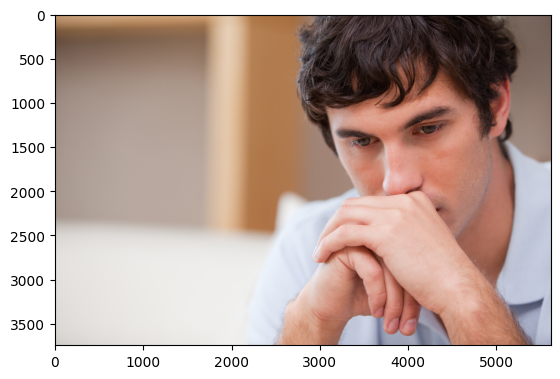

In [5]:
plt.imshow(cv2.cvtColor(cv2.imread("data\sad\8iAb9k4aT.jpg"),cv2.COLOR_BGR2RGB))
plt.show()

In [6]:
data= keras.utils.image_dataset_from_directory('data')

Found 179 files belonging to 2 classes.


In [7]:
def data_split(dataset,train_size=0.8,test_size=0.1,validation_size=0.1,shuffle=True,shuffle_size=1000):
    n=len(dataset)
    if shuffle:
        dataset=dataset.shuffle(shuffle_size,seed=5)
    train=data.take(int(n*train_size))
    temp=data.skip(int(n*train_size))
    validation=temp.take(int(n*validation_size)+1)
    test=temp.skip(int(n*validation_size)+1)
    return train,validation,test

In [8]:
train,test,valid=data_split(data)

In [9]:
train = train.map(lambda x, y: (tf.cast(x/255, tf.float32), y))
valid = valid.map(lambda x, y: (tf.cast(x/255, tf.float32), y))

In [10]:
labels=['happy','Sad']

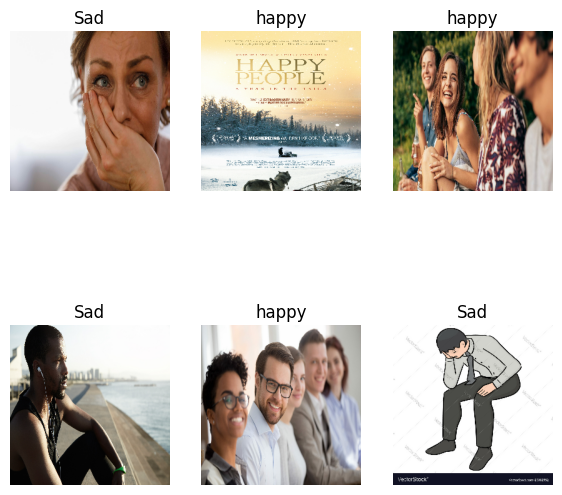

In [11]:
plt.figure(figsize=(7,7))
for batches,label in train.take(1):
    for i in range(6):
        plt.subplot(2,3,i+1)
        plt.imshow(batches.numpy()[i])
        plt.title(labels[label.numpy()[i]])
        plt.axis('off')

In [12]:
train=train.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
test=test.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
validation=valid.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)

In [13]:
model=Sequential()
model.add(Conv2D(32,(3,3),activation='relu'))
model.add(MaxPooling2D())
model.add(Conv2D(64,(3,3),activation='relu'))
model.add(MaxPooling2D())
model.add(Conv2D(128,(3,3),activation='relu'))
model.add(MaxPooling2D())
model.add(Flatten())
model.add(Dense(32,activation='relu'))
model.add(Dense(1,activation='sigmoid'))
model.build(input_shape=(32,256,256,3))

In [14]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (32, 254, 254, 32)          │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (32, 127, 127, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (32, 125, 125, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (32, 62, 62, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (32, 60, 60, 128)           │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (32, 30, 30, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (32, 115200)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (32, 32)                    │       3,686,432 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (32, 1)                     │              33 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 3,779,713 (14.42 MB)

 Trainable params: 3,779,713 (14.42 MB)

 Non-trainable params: 0 (0.00 B)

In [15]:
model.compile(optimizer='adam',loss=keras.losses.binary_crossentropy,metrics=['accuracy'])

In [16]:
history=model.fit(train,validation_data=validation,epochs=20,callbacks=keras.callbacks.TensorBoard(log_dir='logdir'))

Epoch 1/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 6s 881ms/step - accuracy: 0.4594 - loss: 1.7464 - val_accuracy: 0.2105 - val_loss: 0.9856
Epoch 2/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 2s 405ms/step - accuracy: 0.5031 - loss: 0.7761 - val_accuracy: 0.7895 - val_loss: 0.5770
Epoch 3/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 2s 411ms/step - accuracy: 0.6240 - loss: 0.6480 - val_accuracy: 0.8421 - val_loss: 0.5666
Epoch 4/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 2s 407ms/step - accuracy: 0.7458 - loss: 0.5995 - val_accuracy: 0.8947 - val_loss: 0.5326
Epoch 5/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 2s 406ms/step - accuracy: 0.7865 - loss: 0.5290 - val_accuracy: 0.3684 - val_loss: 0.6906
Epoch 6/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 2s 414ms/step - accuracy: 0.6594 - loss: 0.5609 - val_accuracy: 0.8421 - val_loss: 0.4168
Epoch 7/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 2s 410ms/step - accuracy: 0.7115 - loss: 0.5599 - val_accuracy: 0.9474 - val_loss: 0.5186
Epoch 8/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 2s 410ms/step - accuracy: 0.9521 - loss: 0.5091 - val_accuracy: 0.9474 - val_loss:

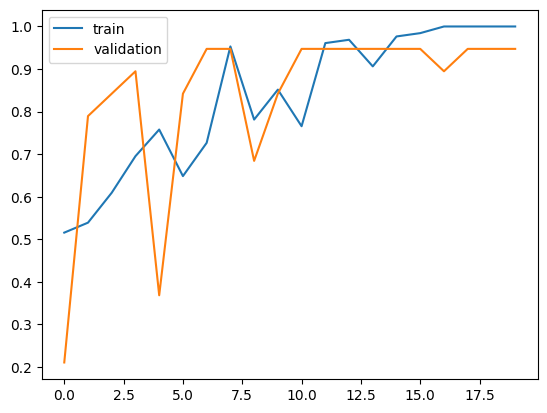

In [17]:
plt.plot(history.history['accuracy'],label='train')
plt.plot(history.history['val_accuracy'],label='validation')
plt.legend()
plt.show()

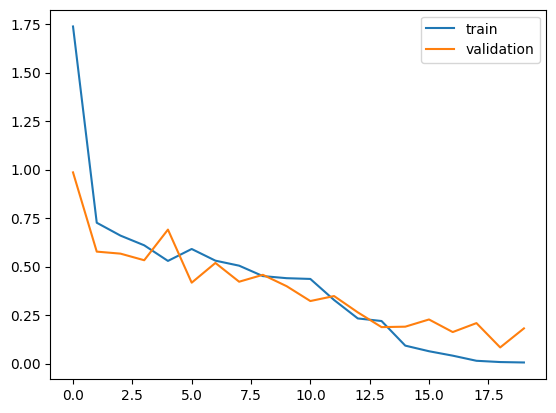

In [18]:
plt.plot(history.history['loss'],label='train')
plt.plot(history.history['val_loss'],label='validation')
plt.legend()
plt.show()

In [19]:
from keras.metrics import Precision,Recall,BinaryAccuracy
pre=Precision()
re=Recall()
ba=BinaryAccuracy()

In [20]:
len(test)

1

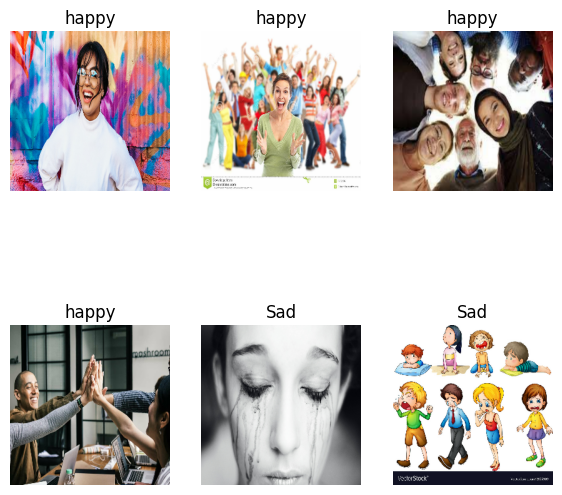

In [21]:
plt.figure(figsize=(7,7))
for batches,label in test:
    for i in range(6):
        plt.subplot(2,3,i+1)
        plt.imshow(batches.numpy().astype('uint8')[i])
        plt.title(labels[label.numpy()[i]])
        plt.axis('off')

In [22]:
for batch in test.as_numpy_iterator():
    x,y=batch
    yhat=model.predict(x)
    pre.update_state(y,yhat)
    re.update_state(y,yhat)
    ba.update_state(y,yhat)
    print(pre.result().numpy(),ba.result().numpy(),re.result().numpy())

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 204ms/step
0.9230769 0.875 0.8


In [25]:
tf.saved_model.save(model,'model1')

INFO:tensorflow:Assets written to: model1\assets


INFO:tensorflow:Assets written to: model1\assets
